# Data Analysis

# Clinic1: Exploratory Data Analysis

In this clinic, first we will:

* Cover a short intro to pandas series and dataframes
* Learn how to read in and write files

By completing and delivering the clinic tasks (in the end) you will know how to :

* Load files and systematically check their integrity
* Parse columns in the dataframe to create new dataframe columns
* Create and interpret visualizations to explore the data set

# 1. The Pandas Library: Series

Pandas is a popular library for manipulating vectors, tables, and time series. We will frequently use Pandas data structures instead of the built-in python data structures, as they provide much richer functionality. Also, Pandas is **fast**, which makes working with large datasets easier.  Check out the official pandas website at [http://pandas.pydata.org/](http://pandas.pydata.org/).

This tutorial is partially based on the [excellent book by Matt Harrison](https://www.amazon.com/Learning-Pandas-Library-Analysis-Visualization-ebook/dp/B01GIE03GW/).

When you work with Pandas, it's handy to have a [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) lying around. 

Pandas provides three data structures: 

 * the **series**, which represents a single column of data similar to a python list
 * the **data frame**, which represents multiple series of data
 * the **panel**, which represents multiple data frames
 
We'll mostly work with series and data frames and largely ignore panels. Today we will stick to series. 

Pandas should already be part of your anaconda installation. If not, simply run:

```
$ conda install pandas
```

To make pandas available, we'll import the module into this notebook. It is customary to import pandas as `pd`:

In [ ]:
import pandas as pd

Series are the most fundamental data structure in pandas. Let's create two simple series based on an arrays:

In [ ]:
bands = pd.Series(["Stones", "Beatles", "Zeppelin", "Pink Floyd"])
bands

In [ ]:
founded = pd.Series([1962, 1960, 1968, 1965])
founded

When we output these objects we can see an index, also called an axis, which by default is an integer sequence starting at 0, and the associated values. 

| Index | Value | 
| - | - |
| 0  |        Stones
|1   |    Beatles
|2  |    Zeppelin
|3 |    Pink Floyd

Pandas also tells us the data type of the values, `object` for the first series – in this case, this is a string, `int64` (a 64-bit integer) for the second.

Notice that `int64` is not a Python datatype, but a C integer of 64 bit length – which, unlike Python integers – can overflow!

We can also use other data types as indices, in which case the series behaves a lot like a dictionary:

In [ ]:
# the data is the first parameter, the index is given by the index keyword
bands_founded = pd.Series([1962, 1960, 1968, 1965, 2012],
                          index=["Stones", "Beatles", "Zeppelin", "Pink Floyd", "Pink Floyd"], 
                          name="Bands founded")
bands_founded

| Index | Value | 
| - | - |
| Stones     |    1962
| Beatles    |    1960
| Zeppelin     |  1968
| Pink Floyd |    1965
| Pink Floyd |    2012

Here we see something interesting: We've used the same index (Pink Floyd) twice, once for the original founding of the band, and once for the re-union starting in 2012. Also, the order of the entries is preserved. 

A series is both, a list and a dictionary! 

We can access the values of an array by printing the member `values`.

In [ ]:
bands.values

And we can look at how the index is composed:

In [ ]:
bands.index

What we see here is that this isn't an explicit list, but rather a set of rules, similar to the ranges we've already worked with. 

Let's compare this to the index where we used explicit labels:

In [ ]:
bands_founded.index

We can access individual entries as we'd access an array or a dictionary:

In [ ]:
bands[0]

In [ ]:
bands_founded["Beatles"]

There is also a method for looking up a value:

In [ ]:
bands_founded.get("Stones")

Note that these access methods are as fast as a dictionary lookup, and much faster than a lookup in a list.

That works also with arrays of labels, in which case the return type is a series, not a single value.

In [ ]:
bands_founded.get(["Stones", "Beatles"])

Notice that when we access data with multiple indices, we don't get a simple datatype, as in the above cases, but instead get another series back:

In [ ]:
bands_founded["Pink Floyd"]

Series also have indexers for label-based access: [`loc`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

In [ ]:
# And one more way for looking up a value:
bands_founded.loc["Stones"]
# this is equivalent to 
# bands_founded["Stones"]

Related to the `loc` indexer is the [`iloc`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html) indexer. However, instead of operating on our label index, `iloc` operates purely on position: 

In [ ]:
bands_founded.iloc[1]

There is also an `ix` indexer, which is deprecated and should not be used.

These ways of accessing slices of a dataset (`loc`, `iloc`), will make more sense when we use dataframes instead of series – in dataframes, `loc` and `iloc` operate on the rows, whereas square brackets operate on the columns.

### 1.1 Iterating

Iteration works as you would expect: 

In [ ]:
for band in bands:
    print(band)

In [ ]:
for band, founded in bands_founded.items():
    print(band + ", " + str(founded))

### 1.2 Updating
Updating works largely as expected, however, you have to be careful when updating series with duplicate indices:

In [ ]:
bands[2] = "The Doors"
bands

We can add a new item by direclty assigning it to a new index.

In [ ]:
bands[4] = "Zeppelin"
bands

Note that the indices don't have to be sequential.

In [ ]:
bands[17] = "The Who"
bands

When we update based on an index that occurs more than once, all instances are updated:

In [ ]:
bands_founded["Pink Floyd"] = 2015
bands_founded

A way to update a specific entry when an index is used multiple time is to use the `iloc` indexer. We can use the `iloc` array to set values based purely on position. However, all of this is rather ugly.

In [ ]:
bands_founded.iloc[3] = 1965
bands_founded

### 1.3 Deleting 

Deleting is rarely done with pandas data structures, instead filters and masks are used. It's possible based on indices:

In [ ]:
del bands_founded["Stones"]
bands_founded

### 1.4 Indexing and slicing

Indexing and slicing works largely like in normal python, but instead of just directly using the bracket notations, it is recommended to use `iloc` for indexing by position and `loc` for indexing by labelled indices. 

In [ ]:
# slicing by position
bands_founded.iloc[1:3]

When slicing by labelled index, the last value specified is *included*, which differs from regular Python slicing behavior.

In [ ]:
# slicing by index
bands_founded.loc["Zeppelin" : "Pink Floyd"]

In [ ]:
# Note that index 17 is included
bands.loc[1:17]

Again, for series (not for data frames), `loc` and just using bracket notation is identical: 

In [ ]:
bands[2:17]

Both, `iloc` and `loc` can be used with arrays, which isn't possible in vanilla Python:

In [ ]:
bands_founded.iloc[[0,3]]

In [ ]:
bands_founded.loc[["Beatles", "Pink Floyd"]]

And, all these variants can also be used with boolean arrays, which we will soon find out to be very helpful:

In [ ]:
bands_founded

In [ ]:
bands_founded.loc[[True, False, False, True]]

### 1.5 Masking and Filtering

With pandas we can create boolean arrays that we can use to mask and filter a dataset. In the following expression, we'll create a new array that has "True" for every band formed after 1964:

In [ ]:
mask = bands_founded > 1964
mask

This uses a technique called **broadcasting**. We can use broadcasting with various operations:

In [ ]:
# Not particularly useful for this dataset..
founding_months = bands_founded * 12
founding_months

We can use a boolean mask to filter a series, as we've seen before:

In [ ]:
# applying the mask to the original array
# note that almost all of those operations return a new copy and don't modify in place
bands_founded[mask]

The short form here would be:

In [ ]:
bands_founded[bands_founded > 1967]

### 1.6 Exploring a Series

There are various way we can explore a series. We can count the number of non-null values: 

In [ ]:
numbers = pd.Series([1962, 1960, 1968, 1965, 2012, None, 2016])
numbers.count()

In [ ]:
numbers

We can get the sum, mean, median of a series:

In [ ]:
numbers.sum()

In [ ]:
numbers.mean()

In [ ]:
numbers.median()

We can also get an overview of the statistical properties of a series: 

In [ ]:
numbers.describe()

Note that None/NaN values are ignored here. We can drop all NaN values if we desire:

In [ ]:
numbers = numbers.dropna()
numbers

This works also for non-numerical data. Of course, we get different measures:

In [ ]:
bands.describe()

Other useful methods are asking for a specific quantile, the minimum, the maximum, etc. 

In [ ]:
numbers.quantile(0.25)

In [ ]:
numbers.max()

In [ ]:
numbers.min()

### 1.7 Sorting 

We can sort a series:

In [ ]:
numbers.sort_values()

And make the sorting descending: 

In [ ]:
sorted_numbers = numbers.sort_values(ascending=False)
sorted_numbers

Note that the indices remain the same! We can **reset the indices**:

In [ ]:
# If we don't specify drop to be true, the previous indices are preserved in a separte column
sorted_numbers = sorted_numbers.reset_index(drop=True)
sorted_numbers

We can also sort by the index:

In [ ]:
# mix up the indices first
new_sorted_numbers = numbers.sort_values()
print(new_sorted_numbers)
print(new_sorted_numbers.sort_index())

### 1.8 Applying a Function

Often, we will want to apply a function to all values of a Series. We can do that with the [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function:

In [ ]:
import datetime

# Convert an integer year into a date, assuming Jan 1 as day and month.
def to_date(year):
    return datetime.date(int(year), 1, 1)
    
new_sorted_numbers.map(to_date)

This is an incredibly powerful concept that you can use to modify series in sophisticated ways, similar to list comprehension. 

Another way to use the map function is to pass in a dictionary that is then applied to matching objects: 

In [ ]:
new_sorted_numbers.map({1965:1945, 2012:1999, 1968:"What"})

 We've only covered a small part of the features of Series here. Make sure to also check out resources such as the [10 minutes to pandas guide](http://pandas.pydata.org/pandas-docs/stable/10min.html).

# Time for fun: Activity in break-out groups

# 2. Reading Data

Up to now, we've mainly used data that we've specified directly in code. This is, of course, not particularly scalable. We want to load data from files and eventually also connect to databases and APIs. 

Data is often stored in structured file formats, such as CSV, JSON, or XML. We'll encounter all of these file formats in this class.

JSON

```json
{
    "fruit": "Apple",
    "size": "Large",
    "color": "Red"
}
```

XML
```xml
<note>
<to>Students</to>
<from>Prof</from>
<heading>Reminder</heading>
<body>HW2 due this Friday at 11:59pm!</body>
</note>
```

The simplest form is a CSV (Comma Separated Values) file. CSV isn't a formal file format, rather it's a table represented as a text file where the cells are separated by a delimiter. Commonly, the first row represents the header. A delimiter can be a tab character, a semicolon, a colon, etc. 

Many CSV files also have a special convention for dealing with text that could include the delimiter. The following text would be very hard to parse otherwise:
```
Artist, Album, Genre
Michael Jackson, Bad, Pop, Funk, Rock
``` 

Here, the album is of multiple genres which are separated by a comma. The comma, however, is also used to delimit the individual columns. 

To work around that, double-quotes are commonly used (though other escape characters are possible) to indicate that all the elements contained within the quotes are not meant to be delimiters:

```
Artist, Album, Genre
Michael Jackson, Bad, "Pop, Funk, Rock"
``` 

Of course, that's problematic if your text contains double-quotes.

Now, it is clear that `Pop, Funk, Rock` should belong in a single cell. 

We've prepared a dataset based on Wikipedia's [list of best-selling albums](https://en.wikipedia.org/wiki/List_of_best-selling_albums) in the file [hit_albums.csv](./hit_albums.csv). 

Here is what the first couple of lines look like:

```
Artist,Album,Released,Genre,"Certified sales (millions)",Claimed sales (millions)
Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65
AC/DC,Back in Black,1980,Hard rock,25.9,50
Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45
Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44
...
```

There are various ways of reading a CSV file. We'll first cover the basic read (and write) operations of Python, but will quickly move on to specific parsers for CSV files in Python and in Pandas. 

### 2.1 Basic File Operations

To read a file we first have to open it by specifying the file path, and specifying whether we want to read (r), write (w), both (r+), or append (a). 

In [ ]:
albums_file = open('hit_albums.csv', 'r')

We can read a whole file at once. Notice that lines are terminated with a special character, a linefeed or newline character specified as `\n`.

In [ ]:
content = albums_file.read()
content

If we print this instead, `\n` is translated into a newline: 

In [ ]:
print(content)

After reading a file, we have to manually close it again to release the OS resources:

In [ ]:
albums_file.close()

As an alternative to reading the whole file, we can read each line separately:

In [ ]:
albums_file = open('hit_albums.csv', 'r')
line1 = albums_file.readline();
print(line1)

We could now [`split()`](https://docs.python.org/3/library/stdtypes.html#str.split) the string based on the comma, to create a simple CSV parser:

In [ ]:
line1.split(",")

After you have called  `readline()`, the next time you call it, it will read the next line. 

We can also treat albums_file as a list (or better, as an iterable data structure) and loop over the file and read the data into an array:

In [ ]:
data = []
for line in albums_file:
    data.append(line.split(","))
    
# let's not forget to close the file:
albums_file.close()
data

We can now read individual cells or rows:

In [ ]:
data[0]

In [ ]:
data[0][1]

As we can see, this **didn't take proper care of our double-quote escape of "Pop, rock, R&B"**. Also, numbers are still treated as strings and the newline character is also appended to the last cell. 

We could certainly improve our parser to handle these issues, but fortunately, there are existing methods to parse CSV files that make this easier.

### 2.2 Writing

We can write by opening a file using the `w` flag. Here we also use the [`with`](https://docs.python.org/3/reference/compound_stmts.html#the-with-statement) keyword, which takes care of closing the file for us, even if things go wrong (see [this blog post](https://jeffknupp.com/blog/2016/03/07/python-with-context-managers/) for details):

In [ ]:
with open('my_file.txt', 'w') as new_file:
    new_file.write("Hello World\nAre you still spinning?\n")

We can now check out this file by opening [my_file.txt](my_file.txt). Notice that the file is only guaranteed to be written if you actually close it (which, here, is take care of by the context manager invoked by the `with` statement). 

You can find more examples on basic file operations in the [Python Documentation](https://docs.python.org/3/tutorial/inputoutput.html).

### 2.3 Reading a CSV file with the CSV Library

We can use the CSV library to help with reading the data. It takes a `delimiter` and a `quotechar` as parameters; the latter is useful for our double quotes:

In [ ]:
# import the csv library
import csv

# initialize the top-level array
data_values = []

# open the file and append rows as arrays to the data_values
with open('hit_albums.csv') as csvfile:
    # note that we can interchangably use ' and " in general
    # for the quotechar, however we use ' so that we can use " without escaping
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    # the row here is an array
    for row in filereader:
        print("Row: " + str(row))
        data_values.append(row)

# Store the header in a separate array
header = data_values.pop(0)
   
print()    
print(header)
print()
print(data_values)

To do computation on the numerical dimensions of this table, we need to convert the strings to numbers. If we just do this the simple way, it won't work: 

In [ ]:
for row in data_values: 
    row[2] = int(row[2])
    row[4] = float(row[4])
    row[5] = float(row[5])
        
data_values

This is because the last column, `Claimed sales (millions)` doesn't have values for each row. In that case, the conversion throws the above `ValueError`. 

These errors are also called Exceptions. [Exceptions](https://docs.python.org/3/reference/compound_stmts.html#try) are error states that can be raised and caught:

In [ ]:
for row in data_values: 
    # need to try and catch the exception because the column contains NaN values
    try:
        row[2] = int(row[2])
        row[4] = float(row[4])
        row[5] = float(row[5])
    except ValueError: 
        row[5] = None
    
data_values

So, here we have matrix that we could work with. In reality, we probably would want to structure the data a little differently: Instead of treating each row as an array, we'd want to treat each dimension (column) as an array, as this makes the column homogeneous and it makes it easy to calculate means, etc. 

### 2.4 Reading CSV with Pandas

Now, let's take a look at what it takes to read this file using pandas.

In [ ]:
hit_albums = pd.read_csv("hit_albums.csv")
hit_albums

Well, that was different! 

Pandas provides the insanely powerful ['read_csv()'](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method. Also see [the documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) for more info on all I/O operations in pandas, including writing CSV files. 

You can pass a lot of arguments to the method, such as delimiter, quote-chars, etc., but for our case the default parameters just worked. 

We've also just created our first data frame! Let's look at data frames in detail next. 

# 3. Data Frames

A data frame is a column-oriented data structure where each column is a pandas series.

Here are two cheat sheets that might prove useful:
[Cheat sheet 1](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
[Cheat sheet 2](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3).

We've already loaded a data frame from file, but for completeness sake, let's create one in code: 

In [ ]:
bandInfo = pd.DataFrame({
        "Name":["Led Zeppelin", "The Beatles", "Rolling Stones", "Radiohead"],
        "No Members":[4, 4, 4, 5],
        "No Albums":[9, 12, 29 ,9]
    })
bandInfo

This dataframe was initialized with a dictonary of column headers as keys and column data as values.

Just as a series, a data frame has an index, which corresponds to the first column here. In this case the index was automatically generated, but as for the series, we could use explicit values for the index. 

We can access columns in a data frame, which returns a series:

In [ ]:
bandInfo["Name"]

In [ ]:
type(bandInfo["Name"])

And obviously, we can do all the things we've learned about to this column/series. 

The previous example used columns to create the data frame. We can also create a data frame from rows. This doesn't make a ton of sense in this example, but data could be available like this from your data source, like if you're parsing a CSV.

In [ ]:
bandInfo2 = pd.DataFrame([
        {"Name":"Led Zeppelin", "No Albums":9, "No Members":4},
        {"Name":"The Beatles", "No Albums":12, "No Members":4},
        {"Name":"Rolling Stones", "No Albums":29, "No Members":4},
        {"Name":"Radiohead", "No Albums":9, "No Members":5},
    ])
bandInfo2

While a series has only one axis, a dataframe has two, one for the rows (the index or '0' axis), one for the columns (the column or '1' axis). We can check out these axes:

In [ ]:
bandInfo.axes

We can access these axes directly:

In [ ]:
# The row axis
bandInfo.axes[0]

In [ ]:
# The columns axis
bandInfo.axes[1]

## Exploring Data Frames

You might have noticed that data frames are rendered in nice HTML tables within Jupyter Notebooks. For small data frames, just showing all the data makes sense, but for larger datasets, like our `hit_albums` dataset, plotting 70+ rows can be annoying, and for datasets with hundreds or thousands of rows it can be prohibitive. By default, a data frame only prints a limited number of elements (notice the `...` in row 30 of the output of `hit_albums` above – only the first 30 and last 30 are printed. 

When working with data, e.g., when transforming or loading a dataset, it is important to see the raw data, for example, to check if a transformation was done correctly. Often, however, it's sufficient to see a part of the data, e.g., the first couple of rows and/or the last couple of rows. We can do this with the `head()` and `tail()` function:

In [ ]:
# head shows the first 5 rows of a datset
hit_albums.head()

In [ ]:
# we can specify how much to show
hit_albums.head(8)

In [ ]:
# tail shows the last five rows in a datasaet
hit_albums.tail()

We can check out the dimensions of the data frame:

In [ ]:
hit_albums.shape

Here we learn that our dataset has 77 rows and 6 columns.

We can also get more info about the dataset using the info method, which is especially helpful to see the data types of the columns:

In [ ]:
hit_albums.info()

As for series, we can get a rough description of the numerical values of the dataset.

In [ ]:
hit_albums.describe()

We don't see any descriptions of the columns of non-numerical type. We can, however, get a summary by directly accessing a column:

In [ ]:
hit_albums["Artist"].describe()

Here we can see that Michael Jackson is the top artist in this list, with five albums. Are there other artists with multiple albums in the list? We can answer that question with the value_counts() method:

In [ ]:
hit_albums["Artist"].value_counts()

We can look at whether the numerical columns in our data frame are correlated using the [`corr()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method. By default, this calculates a Pearson correlation between the column, excluding NaN values. Not surprisingly, we see a rather strong correlation (0.81) between certified and claimed sales. 

In [ ]:
hit_albums.corr()

We can also do transpose a dataframe:

In [ ]:
hit_albums.T

### 3.1 Slicing Data Frames

A common task is to create subsets of a dataframe. Check out the official [user guide for more info on this](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).  

Column access/slicing works by directly using brackets `[]` on the data frame. Row access/slicing works by using the `.loc[]` indexer. 

We can explicitly define the the **column(s)** we want by their lables:

In [ ]:
# a single column
hit_albums["Artist"].head()

We can use an array of lables if we want multiple columns. 

In [ ]:
# specifying multiple columns in an array
hit_albums = hit_albums[["Artist","Certified sales (millions)", "Claimed sales (millions)"]]
hit_albums.head()

Slicing of columns requires the `iloc` operator

This: 
```python
hit_albums["Artist":"Genre"]
```
Doesn't work.

One break with the convention that rows have to be accessed via `loc` or `iloc` is simple numerical slicing. The documentation claims that's for convenience, since this is so common: 

In [ ]:
hit_albums[:3]

Using these access methods we can also update the order: 

In [ ]:
hit_albums[["Certified sales (millions)", "Claimed sales (millions)", "Artist"]].head()

We can set a column to be the index:

In [ ]:
hit_albums_reindexed = hit_albums.set_index("Artist")
hit_albums_reindexed.head()

#### Slicing with `loc`

We can retrieve **rows** and columns using the `loc` indexer by name. Depending on whether the label is unique or not, we get either a series or a data frame. 

Generally, `loc` is preferred over direct access via brackets. 

The general syntax is

```
df.loc[rows, columnns]
```
Here rows, columns can be explicit labels, lists of labels, or slicing operators. 

Here's a simple example: 

In [ ]:
hit_albums_reindexed.loc["Meat Loaf"]

And an example with multiple keys that returns a data frame: 

In [ ]:
hit_albums_reindexed.loc["Michael Jackson"]

The second argument in the `loc` array can be used to access columns 

In [ ]:
hit_albums_reindexed.loc["Michael Jackson", "Certified sales (millions)"]

Here is an example with a list of row labels. 

In [ ]:
hit_albums_reindexed.loc[["Michael Jackson", "Meat Loaf"], "Certified sales (millions)"]

We can use slice operations. Remember, that slicing by label (`loc`) includes the last value, by index (`iloc`) does not. 


Note that this doesn't work if we use labels that have duplicates as indexers. 

In [ ]:
# hit_albums_reindexed.loc["Green Day":"Supertramp"]

# this wouldn't work
hit_albums_reindexed.loc["Green Day":"Michael Jackson"]

This can also be combined with slicing columns: 

In [ ]:
hit_albums_reindexed.loc["Green Day":"Supertramp", ["Certified sales (millions)"]]

We can also slice columns with loc. Let's re-load the full dataset first:  

In [ ]:
full_hit_albums = pd.read_csv("hit_albums.csv")
full_hit_albums.head()

This creates a slice containing all rows and the columns from Artist to Released: 

In [ ]:
full_hit_albums.loc[:,"Artist":"Released"]

Here's a slice for the first 10 rows and columns Artists to Released: 

In [ ]:
full_hit_albums.loc[:10,"Artist":"Released"]

Here is the same thing using `iloc`, i.e., index based slicing:

In [ ]:
full_hit_albums.iloc[0:10, 0:3]

### 3.2 Broadcasting

Of course, we can use broadcasting and filtering based on boolean masks just as we do for series.

Here we boradcast an operation on a series and set it to a new column. 

In [ ]:
full_hit_albums["Certified sales"] =  full_hit_albums["Certified sales (millions)"] * 1000000
full_hit_albums.head()

Here we filter out all of the albums that were released before 1990. 

In [ ]:
mask = full_hit_albums["Released"] > 1990
mask.head()

In [ ]:
full_hit_albums.loc[mask].head()

Or, short: 

In [ ]:
full_hit_albums.loc[full_hit_albums["Released"] > 2000]

### 3.3 Missing values

Let's take care of some NaN values

In [ ]:
hit_albums.tail()

One way would be to just drop them.

In [ ]:
hit_albums.dropna().tail()

However, that's pretty aggressive here – we're dropping more than half of our dataset. We could also just remove the claimed sales. 

An alternative would be to fill the missing values with our best guess: 
We can use the [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) on it.

We could replace all NaN values with 0s: 

In [ ]:
hit_albums.fillna(0).tail()

Thought it's probably better to use the forward fill (`ffill`) method here. By default, `ffill` will use the value of the previous row to fill a NaN value: 

In [ ]:
hit_albums.fillna(method="ffill").tail()

It probably makes more sense to use forward fill along the columns, so that the certified sales are filled into the claimed sales if necessary. We can do that by specifying `axis=1` so that `ffill` works on the columns: 

In [ ]:
# storing the result here
hit_albums = hit_albums.fillna(axis=1, method='ffill')
hit_albums

### 3.4 Grouping Data Frames

Very often, we want to aggregate data. Given the hit-albums dataset, for example, we might want to ask how many albums each artist in that list has sold in total. We can do these aggregations using the [group-by method](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). 

We can specify a column to group by, for example, "Artist". We can look at the groups created:

In [ ]:
grouped = hit_albums.groupby("Artist")
grouped.groups

Note that the keys map to a set of indices. For example, Michael Jackson's albums are found at indices [0, 10, 16, 65, 66].

Once we have created these groups, we can specify what to do with it.

Pandas has a couple of built in functions to make this easy. For example, we can just call `sum()`:

In [ ]:
grouped.sum().head(10)

We can see here that we've summed up the data for each column. However, note that NaN plus some number is still NaN, which is treated as 0 here. So let's work with a slice of the dataframe instead. 


Now we sort them, and have a nice result:

In [ ]:
grouped.sum().sort_values("Certified sales (millions)", ascending=False).head()

An alternative is the `count` method. 

In [ ]:
grouped.count().sort_values("Certified sales (millions)", ascending=False).head(10)

 A very generic solution is the `agg()` function, which we can pass a function to do things with the data:

In [ ]:
#here we pass the sum function, which calcualtes the sum of a list, to the group
grouped.agg(sum).head()

We can also pass in numpy functions. 

In [ ]:
import numpy as np
grouped.agg(np.max).sort_values("Certified sales (millions)", ascending=False).head(20)

Here is an aggregation with an in-line function definition where we still create the sum, but also multiply by a million. We use a [lambda expression](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) to define the function:

In [ ]:
grouped.agg(lambda rows : sum([cell * 1000000 for cell in rows])).head(10)

Lambda expressions are just a different way of defining a function in line, without assigning it a name. They only work for a single statement. 

Here is a simple lambda expression, which returns a function, which we assign to the variable add:

In [ ]:
add = lambda a, b : a+b

In [ ]:
add(2, 3)

So, let's take this apart: 

```python
[cell * 1000000 for cell in rows]
```

This part is a list comprehension, that takes an array `rows` and multiplies every element with 1,000,000. 

The surrounding `sum` is a call to the sum function, so adds up the values in the just modified array. 

And finally, the lambda expression packs all of this in a function. 

Here is a different, longer way to write this: 

In [ ]:
def sumUpAndMultiplyByMillion(rows):
    multiplied_rows = [cell * 1000000 for cell in rows]
    summed_value = sum(multiplied_rows)
    return summed_value

grouped.agg(sumUpAndMultiplyByMillion).head(10)

## 4. A note on buit-in Plotting

Dataframes have built-in plotting capabilities based on the [matplotlib](http://matplotlib.org/) library. Refer to the data visualization notebook for all capabilities of plotting with Pandas.

First, we have to import the matplotlib library, and tell Jupyter to display the images directly here:

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# This next line tells jupyter to render the images inline
%matplotlib inline

Then we can simply call the plot attribute:

In [ ]:
hit_albums.plot()

We can also selected certain columns using labelled indexes and then plot.

In [ ]:
hit_albums["Certified sales (millions)"].plot()

We can also use bar-charts instead of line-charts:

In [ ]:
hit_albums[["Certified sales (millions)", "Claimed sales (millions)"]].plot(kind="bar")

The default is a line chart. This doesn't make much sense, since it's mixing index of the row with sales. We're better off plotting only the two different sales figures.

A better way to compare certified and claimed sales is a scatterplot:

In [ ]:
# this is currently broken due to a pandas bug. 
hit_albums.plot(kind='scatter',x="Certified sales (millions)", y="Claimed sales (millions)")

Or a histogram: 

In [ ]:
hit_albums.plot.hist(bins=12, alpha=0.5)

Of course there is more sophisticated plotting (please follow the visualization notebook from the lectures)

## 5. A note on the basic EDA workflow

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## DELIVERABLES (DEADLINE 12/February late night, wildcards possible)

Honor code applies from these tasks onwards (only individual work)

Instructions for the deliverable: 

* It might be best if you start a new notebook and copy all the "clean" code that you are using for loading the file (as we did in Section 3). Then, include your work about tasks 1.1-1.8.

* Make sure that you include a proper amount/mix of comments, results and code.

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. Enjoy!

### Task 1.1: Calculate the mean certified sales for all albums

Compute the mean certified sales for all albums and print the output in a formatted way.

Your output could look like this:
    
    Mean certified sales: xxx.xxxx

In [15]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn
sn.set()

In [2]:
df = pd.read_csv('hit_albums.csv')
print('Mean certified sales: %.4f' %df['Certified sales (millions)'].mean())

Mean certified sales: 22.4091


### Task 1.2: Compare the runtime

Measure the runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop (you can copy the relevant parts from Task 1).

You can use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to set timestamps before and after the execution of the code you want to measure, then you simply substract end time from start time.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    time using own code: xxx.xxx s  
    time using Pandas: xxx.xxx s  
    difference factor: xxx
    
Interprete the results. Is this difference substantial?     

In [3]:
from time import time
def own_mean():
    total = 0
    i = 0
    for s in df['Certified sales (millions)']:
        total += s
        i += 1
    return total/i
t = time()
m1 = own_mean()
t1 = time() - t
print('time using own code: %f s' %t1)
t = time()
m2 = df['Certified sales (millions)'].mean()
t2 = time() - t
print("time using Pandas: %f s" %t2)
print("difference factor: %f" %(t2-t1))
print(m1, m2)

time using own code: 0.000154 s
time using Pandas: 0.000433 s
difference factor: 0.000279
22.40909090909091 22.40909090909091


**Your Interpretation**:

1. Dataset too small. Overhead beats computation.
2. Library has more logics behind, such as check for na value.
3. Optimization for python code has improved over the years.

So our own implementation wins.

### Task 1.3: Finding major albums (by filtering rows)

Use pandas to filter your dataframe to contain only albums with more than 20 million certified sales.


Count and print the number of albums with more than 20 million certified sales. We call these major albums.

E.g.:
    xxx.xxx albums have more than 20 million certified sales

In [4]:
print("%d albums have more than 20 million certified sales" %(len(df[df['Certified sales (millions)'] > 20])))

42 albums have more than 20 million certified sales


### Task 1.4: Filter out rows and count specific features

From the major albums you filtered out in a previous task, find out 
 * How many are pop
 * How many are rock
 * How many are both, pop and rock
 
Create new dataframes for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major albums are pop.
    xxx.xxx major albums are rock.
    xxx.xxx major albums are both, pop and rock.

In [5]:
major = df[df['Certified sales (millions)']>20]
genres = major['Genre'].str.get_dummies(sep=', ')
genres.columns #list all categories for ease of select in the next step

Index(['Alternative rock', 'Britpop', 'Country', 'Folk rock', 'Hard rock',
       'Heavy metal', 'Jazz', 'New wave', 'Nu metal', 'Pop',
       'Progressive rock', 'R&B', 'Rap', 'Reggae', 'Rock', 'Soft rock',
       'Soundtrack', 'Soundtrack/R&B', 'alternative metal', 'dance',
       'folk rock', 'funk', 'hard rock', 'heavy metal', 'hip hop', 'hip-hop',
       'pop', 'pop rock', 'progressive rock', 'rap metal', 'rock', 'soft rock',
       'soul', 'synthpop'],
      dtype='object')

In [6]:
# Here I interpret labels to be hierarchical, so for example, Hard rock is a kind of rock
pop = (genres['Pop'] == 1) | (genres['Britpop'] == 1) | (genres['pop'] == 1)
print("%d major albums are pop." %pop.sum())
rock = ((genres['Alternative rock'] == 1) | (genres['Folk rock'] == 1) | 
                                    (genres['Hard rock'] == 1) | (genres['Progressive rock'] == 1) | 
                                    (genres['Rock'] == 1) | (genres['Soft rock'] == 1) | 
                                    (genres['folk rock'] == 1) | (genres['hard rock'] == 1) | 
                                    (genres['pop rock'] == 1) | (genres['progressive rock'] == 1) |
                                    (genres['rock'] == 1) | (genres['soft rock'] == 1))
print("%d major albums are rock." %rock.sum())
pop_and_rock = pop & rock
print("%d major albums are both, pop and rock." %pop_and_rock.sum())

19 major albums are pop.
22 major albums are rock.
5 major albums are both, pop and rock.


In [7]:
pop_and_rock[pop_and_rock == 1]

0     True
10    True
12    True
43    True
53    True
dtype: bool

In [8]:
#print the corresponding rows which belong to both rock and pop to check for correctness
df.iloc[[0, 10, 12, 43, 53]]

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
10,Michael Jackson,Bad,1987,"Pop, funk, rock",20.3,34.0
12,Celine Dion,Falling into You,1996,"Pop, Soft rock",20.2,32.0
43,Phil Collins,No Jacket Required,1985,"Pop, Rock",25.0,NaN
53,Oasis,(What's the Story) Morning Glory?,1995,"Britpop, rock",22.0,NaN


### Task 1.5: Compare certified sales of different categories

Now we want to compare the certified sales for pop and rock albums for major albums.

Compute the average, maximum, minimum, standard deviation, and the median for each category.

Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [9]:
major[pop==1]['Certified sales (millions)'].describe()

count    19.000000
mean     25.957895
std       5.411235
min      20.200000
25%      23.500000
50%      25.000000
75%      27.700000
max      45.400000
Name: Certified sales (millions), dtype: float64

In [10]:
major[rock == 1]['Certified sales (millions)'].describe()

count    22.000000
mean     24.859091
std       5.620342
min      20.200000
25%      21.350000
50%      23.750000
75%      25.675000
max      45.400000
Name: Certified sales (millions), dtype: float64

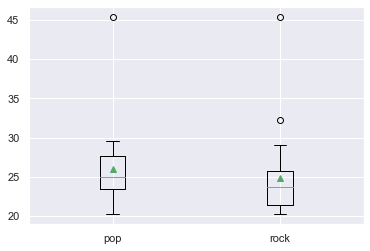

In [16]:
plt.boxplot([major[pop==1]['Certified sales (millions)'], major[rock==1]['Certified sales (millions)']], showmeans=True, labels=['pop','rock']);

**Your Interpretation**: TODO

Pop music has higher sales than rock by mean, median and quartile standards. However the latter does not fall too behind, as rock music in the top chart usually sounds as well cheesy.

### Task 1.6: Albums per year

Calcluate how many major albums in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of albums
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of albums per year.

In [ ]:
major.groupby('Released')['Album'].count().sort_index()

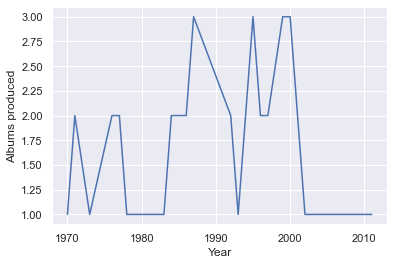

In [17]:
plt.plot(major.groupby('Released')['Album'].count())
plt.xlabel('Year')
plt.ylabel('Albums produced');

### Task 1.7: Yearly average

Compute the average certified sales per year for all major albums.  
Use the numbers you computed to plot a line chart.
Plot the year on the x-axis and the average rating on th y axis.  

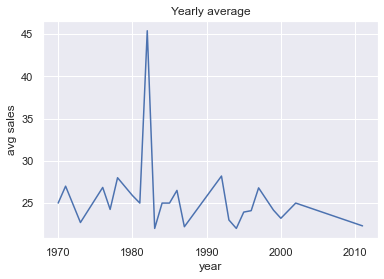

In [29]:
plt.plot(major.groupby('Released')['Certified sales (millions)'].mean())
plt.xlabel('year')
plt.ylabel('avg sales');
plt.title('Yearly average');

### Task 1.8: Explore and Interpret

Are old or new albums selling better? How could you explain this? 

Are there differences between the sales of major albums and all albums over time? 

Continue to explore and use plots to inform your answer.

Interesting measures to consider are the total sales per year, etc.

In [19]:
major_avg_sale = major['Certified sales (millions)'] / (2020 - major['Released'])
df['avg sale over year'] = df['Certified sales (millions)'] / (2020 - df['Released'])

Text(0.5, 1.0, 'KDE for major and all')

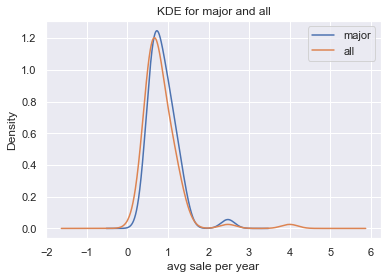

In [20]:
major_avg_sale.plot(kind='kde', label='major')
df['avg sale over year'].plot(kind='kde', label='all')
plt.xlabel('avg sale per year')
plt.legend();
plt.title('KDE for major and all')

In [21]:
major_avg_sale.describe()

count    42.000000
mean      0.884301
std       0.358317
min       0.479070
25%       0.647834
50%       0.815611
75%       1.041537
max       2.477778
dtype: float64

In [22]:
df['avg sale over year'].describe()

count    77.000000
mean      0.826665
std       0.488827
min       0.247170
25%       0.575862
50%       0.714286
75%       0.992000
max       4.000000
Name: avg sale over year, dtype: float64

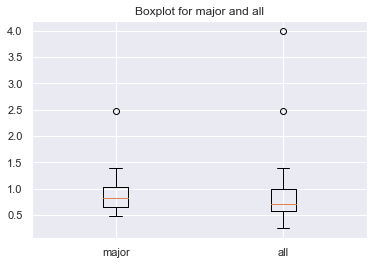

In [23]:
plt.boxplot([major_avg_sale, df['avg sale over year']], labels=['major', 'all']);
plt.title('Boxplot for major and all');

In [24]:
major_avg_sale[major_avg_sale > 2]

20    2.477778
dtype: float64

In [25]:
major.loc[20]

Artist                            Adele
Album                                21
Released                           2011
Genre                         Pop, soul
Certified sales (millions)         22.3
Claimed sales (millions)             30
Name: 20, dtype: object

In [26]:
df[df['avg sale over year'] > 2]

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions),avg sale over year
20,Adele,21,2011,"Pop, soul",22.3,30.0,2.477778
56,Adele,25,2015,"Soul, pop, R&B",20.0,NaN,4.000000


**Your interpretation**: TODO

The density plots from major albums and from all albums look quite similar. The major has slightly higher average sales than all albums, as shown in the boxplot as well. Major category is affected by outliner, and it is even more so for category of all albums. 

In fact, as shown in the cells above, all outliners come from Adele's album, Album "21" was released in 2011 and is considered already as our major ablum with 22.3 million sales, so it is shown in both categories. Album "25" has right 20 million certified sales so it becomes the outliner in the all category.

So it is wrong to claim that the old albums sell better. In modern era, the internet also brings a lot of revenues, so is the frequent apperance on TV etc.

########################### glorious segment line off marking #####################################

p.s. It is not quite right to average the sales over all years. To accurately show the trend of sales over years, we just need sales over years, i.e., the original data that compilates the total sales. 

It is not morally right to tell a story in this case, since there's no story to tell if you can have the fact at your hand. 